<a href="https://colab.research.google.com/github/SushmitaSamaddar5/Diabetes_Predictor/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [3]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Exploratory Data Analysis (EDA)

Checking missing values

In [4]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Removing duplicate data

In [6]:
df.duplicated().sum()

3854

In [7]:
df=df.drop_duplicates()
df.duplicated().sum()

0

Data Visualisation

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

Age

<BarContainer object of 3 artists>

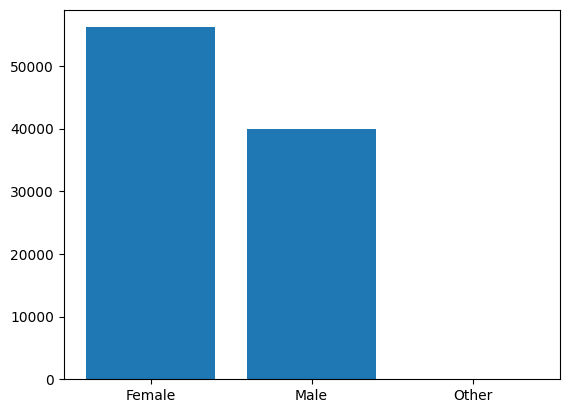

In [9]:
gender_count = df['gender'].value_counts()
plt.bar(gender_count.index, gender_count.values)

<Axes: ylabel='Frequency'>

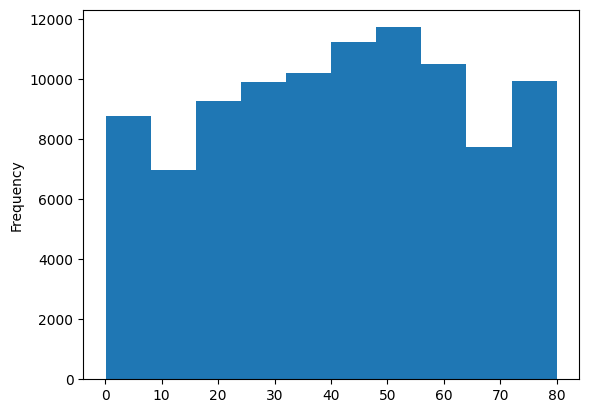

In [10]:
df.age.plot(kind='hist')

Gender and Smoking History

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df['smoking_history'] = encoder.fit_transform(df['smoking_history'])

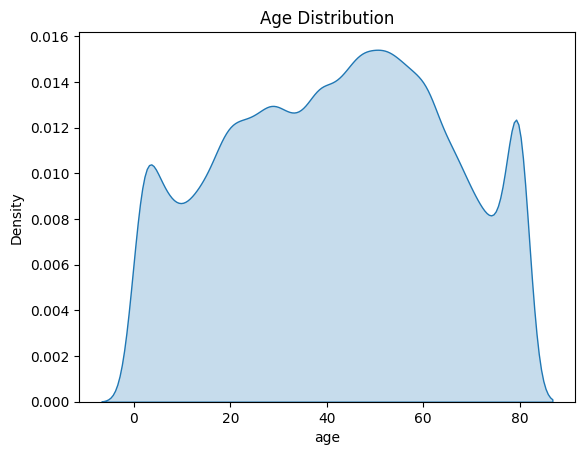

In [12]:
sns.kdeplot(df['age'], fill=True)
plt.title('Age Distribution')
plt.show()

<Axes: >

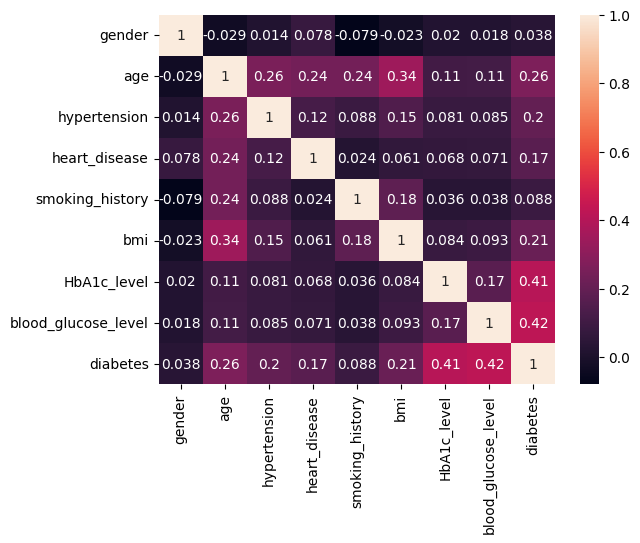

In [13]:
sns.heatmap(df.corr(), annot=True)

after looking at the heatmap, we can see that not all column have correlation to diabetes, so we gonna use the column that have strong correlation with diabetes

In [14]:
X = df[['age', 'bmi', 'blood_glucose_level', 'HbA1c_level', 'hypertension']]
y = df['diabetes']

Split the data into train and test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
model.score(X_test, y_test)

0.9596983879355174

We got 95% accuracy by using Logistic Regression

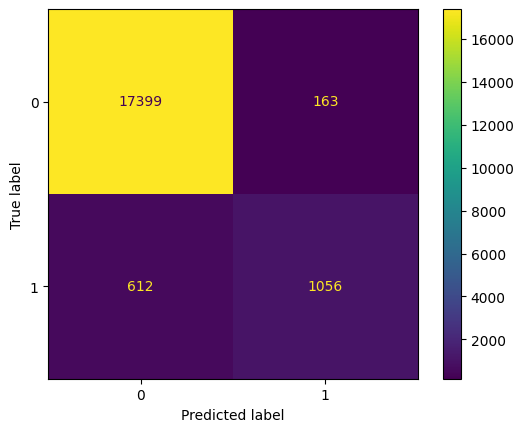

In [19]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17562
           1       0.87      0.63      0.73      1668

    accuracy                           0.96     19230
   macro avg       0.92      0.81      0.85     19230
weighted avg       0.96      0.96      0.96     19230



              precision    recall  f1-score   support

           0       0.97      0.94      0.95     17562
           1       0.52      0.66      0.58      1668

    accuracy                           0.92     19230
   macro avg       0.74      0.80      0.77     19230
weighted avg       0.93      0.92      0.92     19230



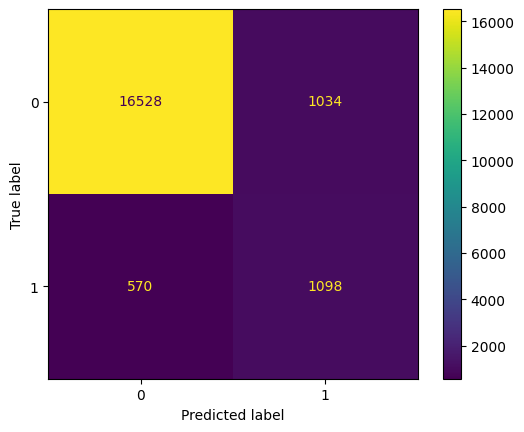

In [21]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

cm1=confusion_matrix(y_test,y_pred1)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()


print(classification_report(y_test,y_pred1))

In [22]:
from sklearn.metrics import accuracy_score

print("Logistric Regression model accuracy is",accuracy_score(y_test,y_pred)*100,"%")

print("Naive Bayes Model accuracy is",accuracy_score(y_test,y_pred1)*100,"%")

Logistric Regression model accuracy is 95.96983879355174 %
Naive Bayes Model accuracy is 91.6588663546542 %
